## First i will be importing the libraries from python to perform my further steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Here i am reading my csv file

In [2]:
df = pd.read_csv('Anime_list.csv')   #--------> following is the code to read a csv file
df

,Unnamed: 0,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013.0,"Centuries ago, mankind was slaughtered to near...",Shounen,Finished,25.0,24.0,3.5M
1,1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.62,2006.0,"Brutal murders, petty thefts, and senseless vi...",Shounen,Finished,37.0,23.0,3.5M
2,2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009.0,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64.0,24.0,3.0M
3,3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.92,2016.0,"The appearance of ""quirks,"" newly discovered s...",Shounen,Finished,13.0,24.0,2.7M
4,4,Naruto,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Shounen,Finished,220.0,23.0,2.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3163,Jiutian Qi Yuan,Unknown,Kids,"Adventure, Fantasy",Original,NaN,2012.0,NaN,Kids,Finished,26.0,13.0,15
3164,3164,Kaka He Ta De Pengyoumen,Unknown,Kids,Fantasy,Original,NaN,2010.0,NaN,Kids,Finished,104.0,10.0,15
3165,3165,Kangri Xiao Qibing,Unknown,"Historical, Military",NaN,NaN,NaN,2006.0,NaN,Kids,Finished,26.0,12.0,15
3166,3166,Shenqi De Baoshi,Unknown,Anthropomorphic,Fantasy,Original,NaN,2011.0,NaN,Kids,Finished,300.0,5.0,15


# Now , i will take a glance of all the information of my data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3168 non-null   int64  
 1   name                     3168 non-null   object 
 2   studio                   3168 non-null   object 
 3   theme                    3168 non-null   object 
 4   tags                     2595 non-null   object 
 5   source                   2659 non-null   object 
 6   rating                   1839 non-null   float64
 7   year                     3121 non-null   float64
 8   synopsis                 2358 non-null   object 
 9   demographic              3168 non-null   object 
 10  status                   3144 non-null   object 
 11  eps                      3047 non-null   float64
 12  eps_avg_duration_in_min  3102 non-null   float64
 13  rated_by                 3168 non-null   object 
dtypes: float64(4), int64(1),

# Here i am finding total number of null values present in my columns

In [4]:
df.isnull().sum()

Unnamed: 0                    0
name                          0
studio                        0
theme                         0
tags                        573
source                      509
rating                     1329
year                         47
synopsis                    810
demographic                   0
status                       24
eps                         121
eps_avg_duration_in_min      66
rated_by                      0
dtype: int64

# Here i am calculating the percentage of null values present in my columns

In [5]:
df.isnull().sum()/len(df)*100

Unnamed: 0                  0.000000
name                        0.000000
studio                      0.000000
theme                       0.000000
tags                       18.087121
source                     16.066919
rating                     41.950758
year                        1.483586
synopsis                   25.568182
demographic                 0.000000
status                      0.757576
eps                         3.819444
eps_avg_duration_in_min     2.083333
rated_by                    0.000000
dtype: float64

# Now i will be cleaning the data for further analysis.

## As there is no need of the 'Unnamed' column i will be dropping it.

In [6]:
df.drop(['Unnamed: 0'],axis =1,inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3168 non-null   object 
 1   studio                   3168 non-null   object 
 2   theme                    3168 non-null   object 
 3   tags                     2595 non-null   object 
 4   source                   2659 non-null   object 
 5   rating                   1839 non-null   float64
 6   year                     3121 non-null   float64
 7   synopsis                 2358 non-null   object 
 8   demographic              3168 non-null   object 
 9   status                   3144 non-null   object 
 10  eps                      3047 non-null   float64
 11  eps_avg_duration_in_min  3102 non-null   float64
 12  rated_by                 3168 non-null   object 
dtypes: float64(4), object(9)
memory usage: 321.9+ KB


# Filling the null values of the 'Rating' and 'Eps' column by using mean

In [8]:
rm = df["rating"].mean()
df['rating'].fillna(rm,inplace = True)

In [9]:
sm = df["eps"].mean()
df['eps'].fillna(sm,inplace = True)

## As we can see there are no null values present in the 'Rating' and 'Eps' column

In [10]:
df.isnull().sum()

name                         0
studio                       0
theme                        0
tags                       573
source                     509
rating                       0
year                        47
synopsis                   810
demographic                  0
status                      24
eps                          0
eps_avg_duration_in_min     66
rated_by                     0
dtype: int64

## Here i am changing the datatype of episodes from float to int for better understanding

In [11]:
df['eps'] = df['eps'].astype(int)

### As the rated by column have raters in Million and in Thousands i am converting them into millions for better understanding by creating a function

In [12]:
def convert_size(x):
    x = str(x)
    if 'M' in x:
        x = x.replace('M','')
        return float(x)*100000
    elif 'K' in x:
        x = x.replace('K','')
        return float (x)*1000
    else:
        return float(x)*1000

In [13]:
df['rated_by']=df['rated_by'].map(convert_size)

In [14]:
df.tail()

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
3163,Jiutian Qi Yuan,Unknown,Kids,"Adventure, Fantasy",Original,7.033518,2012.0,NaN,Kids,Finished,26,13.0,15000.0
3164,Kaka He Ta De Pengyoumen,Unknown,Kids,Fantasy,Original,7.033518,2010.0,NaN,Kids,Finished,104,10.0,15000.0
3165,Kangri Xiao Qibing,Unknown,"Historical, Military",NaN,NaN,7.033518,2006.0,NaN,Kids,Finished,26,12.0,15000.0
3166,Shenqi De Baoshi,Unknown,Anthropomorphic,Fantasy,Original,7.033518,2011.0,NaN,Kids,Finished,300,5.0,15000.0
3167,Shucai Wangguo,Unknown,Anthropomorphic,"Adventure, Fantasy",Original,7.033518,2014.0,NaN,Kids,Finished,32,12.0,15000.0


# Now i will be performing my analysis

## 1) Displaying records of all the anime whose ratings are above 9

In [15]:
df.loc[df['rating']>9.0]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009.0,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64,24.0,300000.0
6,Hunter x Hunter (2011),Madhouse,Shounen,"Action, Adventure, Fantasy",Manga,9.04,2011.0,Hunters devote themselves to accomplishing haz...,Shounen,Finished,148,23.0,250000.0
16,Shingeki no Kyojin Season 3 Part 2,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,9.07,2019.0,Seeking to restore humanity's diminishing hope...,Shounen,Finished,10,23.0,190000.0
114,Gintama°,Bandai Namco Pictures,"Gag Humor, Historical, Parody, Samurai","Action, Comedy, Sci-Fi",Manga,9.08,2015.0,"Gintoki, Shinpachi, and Kagura return as the f...",Shounen,Finished,51,24.0,552000.0
122,Gintama',Sunrise,"Gag Humor, Historical, Parody, Samurai","Action, Comedy, Sci-Fi",Manga,9.05,2011.0,"After a one-year hiatus, Shinpachi Shimura ret...",Shounen,Finished,51,24.0,487000.0
182,Gintama': Enchousen,Sunrise,"Gag Humor, Historical, Parody, Samurai","Action, Comedy, Sci-Fi",Manga,9.04,2012.0,"While Gintoki Sakata was away, the Yorozuya fo...",Shounen,Finished,13,24.0,290000.0
924,Kaguya-sama wa Kokurasetai: Ultra Romantic,A-1 Pictures,"Psychological, Romantic Subtext, School","Comedy, Suspense",Manga,9.12,2022.0,The elite members of Shuchiin Academy's studen...,Seinen,Finished,13,23.0,641000.0
1305,Fruits Basket: The Final,TMS Entertainment,Shoujo,"Drama, Romance, Supernatural",Manga,9.03,2021.0,"Hundreds of years ago, the Chinese Zodiac spir...",Shoujo,Finished,13,23.0,371000.0


# ------> So there are total of 8 animes whose rating is above 9 <------

## 2) Displaying the max rated anime

In [16]:
df['rating'].max()

9.13

In [17]:
df.loc[df['rating']==9.13]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.13,2009.0,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64,24.0,300000.0


## ----->The max rated anime from this list is Fullmetal Alchemist: Brotherhood<-----

# 3) Displaying the anime which are currently been aired

In [18]:
df.loc[df['status']=='Airing']

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
14,One Piece,Toei Animation,Shounen,"Action, Adventure, Fantasy",Manga,8.660000,1999.0,"Gol D. Roger was known as the ""Pirate King,"" t...",Shounen,Airing,43,24.0,200000.0
76,Boruto: Naruto Next Generations,Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,5.790000,2017.0,Following the successful end of the Fourth Shi...,Shounen,Airing,43,23.0,771000.0
167,Detective Conan,TMS Entertainment,Detective,"Adventure, Comedy, Mystery",Manga,8.160000,1996.0,"Shinichi Kudou, a high school student of astou...",Shounen,Airing,43,25.0,316000.0
168,Yofukashi no Uta,LIDENFILMS,Vampire,"Romance, Supernatural",Manga,8.060000,2022.0,Kou Yamori is an average middle school student...,Shounen,Airing,13,22.0,312000.0
176,"Kanojo, Okarishimasu 2nd Season",TMS Entertainment,Shounen,"Comedy, Romance",Manga,6.510000,2022.0,"A year after they met, Kazuya Kinoshita and Ch...",Shounen,Airing,12,24.0,297000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,Origami Ninja Koyankinte,Directions,Kids,Comedy,NaN,7.033518,2020.0,"Koyan, the Origami Ninja, came to Earth from h...",Kids,Airing,43,0.0,202000.0
2344,Papan Ga Panda!,Unknown,Music,NaN,Original,7.033518,2012.0,A series of shorts broadcasted on Kids Station...,Kids,Airing,43,0.0,170000.0
2378,Duel Masters Win,Unknown,Kids,"Action, Adventure, Comedy, Fantasy",Original,7.033518,2022.0,NaN,Kids,Airing,43,0.0,143000.0
2486,Akikan no Tuna,dwarf,Kids,Comedy,Original,7.033518,2022.0,The adventures of a tuna can.\n\n\n\n\n\nStudi...,Kids,Airing,43,5.0,80000.0


# --------->There are 62 animes which are currently been aired <------------

# 4) Most awaited animes which will be released after 2022

In [19]:
df.loc[df['year']>2022]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
254,Shingeki no Kyojin: The Final Season - Kankets...,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,7.033518,2023.0,NaN,Shounen,Not,43,NaN,178000.0
309,Dr. Stone: New World,TMS Entertainment,Time Travel,"Adventure, Comedy, Sci-Fi",Manga,7.033518,2023.0,"Third season of Dr. Stone, airing in Spring 20...",Shounen,Not,43,NaN,127000.0
351,Tokyo Revengers: Seiya Kessen-hen,LIDENFILMS,"Delinquents, School","Action, Drama, Supernatural",Manga,7.033518,2023.0,Second season of Tokyo Revengers.\n\n\n\n\n\nS...,Shounen,Not,43,NaN,93000.0
372,Jujutsu Kaisen 2nd Season,Unknown,School,"Action, Fantasy",Manga,7.033518,2023.0,Second season of Jujutsu Kaisen.\n\n\n\n\n\nSt...,Shounen,Not,43,NaN,83000.0
410,Kyokou Suiri 2nd Season,Brain's Base,Mythology,"Mystery, Romance, Supernatural",Manga,7.033518,2023.0,Second season of Kyokou Suiri.\n\n\n\n\n\nStud...,Shounen,Not,43,NaN,62000.0
557,Mato Seihei no Slave,Seven Arcs,Harem,"Action, Fantasy, Supernatural",Manga,7.033518,2023.0,When entrances to a different dimension known ...,Shounen,Not,43,NaN,19000.0
664,Kyuuketsuki Sugu Shinu 2nd Season,Madhouse,"Gag Humor, Vampire","Comedy, Supernatural",Manga,7.033518,2023.0,Second season of Kyuuketsuki Sugu Shinu.\n\n\n...,Shounen,Not,43,NaN,9000.0
674,Mashle,Unknown,Parody,"Action, Comedy, Supernatural",Manga,7.033518,2023.0,"To everyone else in his magic-dominated world,...",Shounen,Not,43,NaN,8700.0
703,Ayakashi Triangle,Unknown,Shounen,"Action, Comedy, Romance, Ecchi",Manga,7.033518,2023.0,Matsuri Kazamaki and Suzu Kanade are childhood...,Shounen,Not,43,NaN,5900.0
727,"Shangri-La Frontier: Kusoge Hunter, Kamige ni ...",C2C,Video Game,"Action, Adventure, Fantasy",Manga,7.033518,2023.0,Second year high school student Rakurou Hizuto...,Shounen,Not,43,NaN,4600.0


# ------->There are total 27 animes which will be released after 2022<-----

# 5) Displaying animes whose theme is seinen

In [20]:
df.loc[df['theme']=='Seinen']

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
913,Black Bullet,Kinema Citrus,Seinen,"Action, Mystery, Sci-Fi",Light novel,7.110000,2014.0,"In the year 2021, a parasitic virus known as ""...",Seinen,Finished,13,24.0,857000.0
921,Grand Blue,Zero-G,Seinen,Comedy,Manga,8.430000,2018.0,Iori Kitahara moves to the coastal town of Izu...,Seinen,Finished,12,24.0,665000.0
938,Chobits,Madhouse,Seinen,"Comedy, Drama, Romance, Sci-Fi, Ecchi",Manga,7.410000,2002.0,"When computers start to look like humans, can ...",Seinen,Finished,26,24.0,454000.0
939,Gleipnir,Pine Jam,Seinen,"Action, Mystery, Supernatural, Ecchi",Manga,7.000000,2020.0,Shuuichi Kagaya is what one would consider an ...,Seinen,Finished,13,23.0,422000.0
952,Ping Pong the Animation,Tatsunoko Production,Seinen,"Drama, Sports",Manga,8.620000,2014.0,"Despite being polar opposites, Makoto ""Smile"" ...",Seinen,Finished,11,23.0,351000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,Chie-chan Funsenki: Jarinko Chie,Tokyo Movie Shinsha,Seinen,"Comedy, Drama",NaN,7.033518,1991.0,"An adaptation of the first series, with differ...",Seinen,Finished,39,25.0,453000.0
1274,Kariage-kun,Toei Animation,Seinen,"Comedy, Slice, of, Life",NaN,7.033518,1989.0,Based on the same name yonkoma manga by Ueda M...,Seinen,Finished,59,25.0,424000.0
1275,Mannaka no Rikkun@Kin Tele,Sakura Create,Seinen,Comedy,Manga,7.033518,2019.0,"The ""home comedy"" centers on the mischievous b...",Seinen,Finished,12,5.0,406000.0
1276,Hana no Kakarichou,Unknown,Seinen,"Comedy, Slice, of, Life",NaN,7.033518,1976.0,A wacky comedy about a man from a noble ancest...,Seinen,Finished,25,25.0,390000.0


# ------>There are total 74 seinen themed anime in this dataset <------

### 6) Here I am plotting demography of anime which  is been displayed with the help of  pie chart

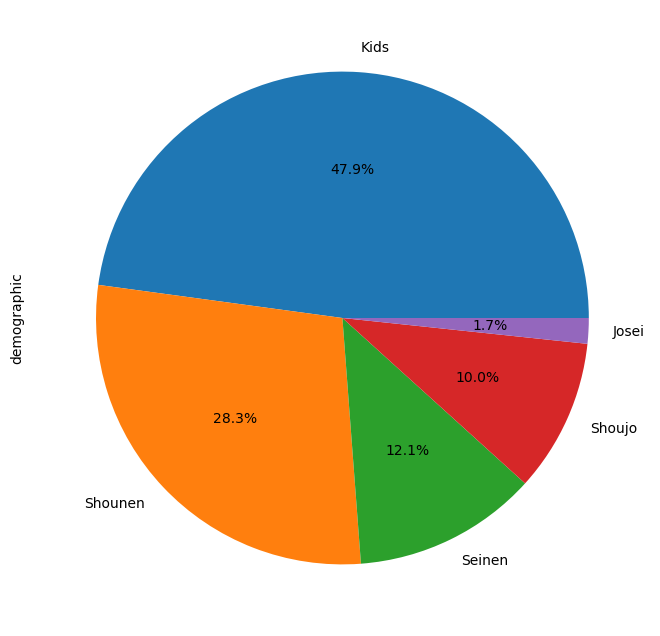

In [21]:
plt.figure(figsize=(8,8))
df['demographic'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

#### ->As we can see the kids demography is the highest which holds total of 47.9% while josei holding demography of only 1.7%<-

# 7) Displaying the  source of anime

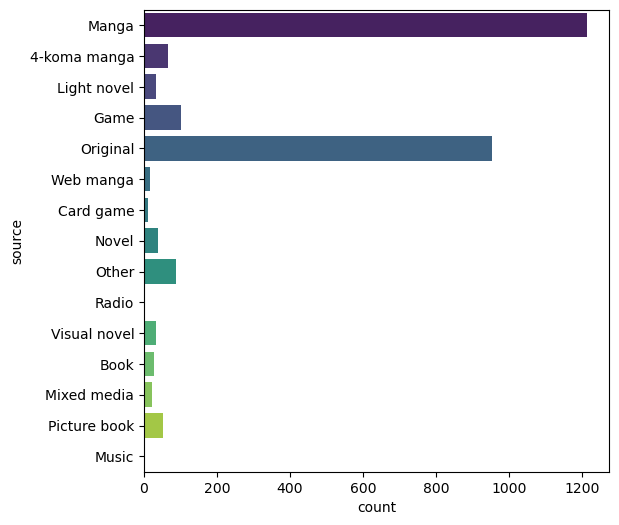

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,y=df['source'],palette='viridis')
plt.show()

### --->Manga has topped the list here , as over 1200 animes are been adapted through manga <---

# 8) Displaying the years of anime from 1964 to 2022

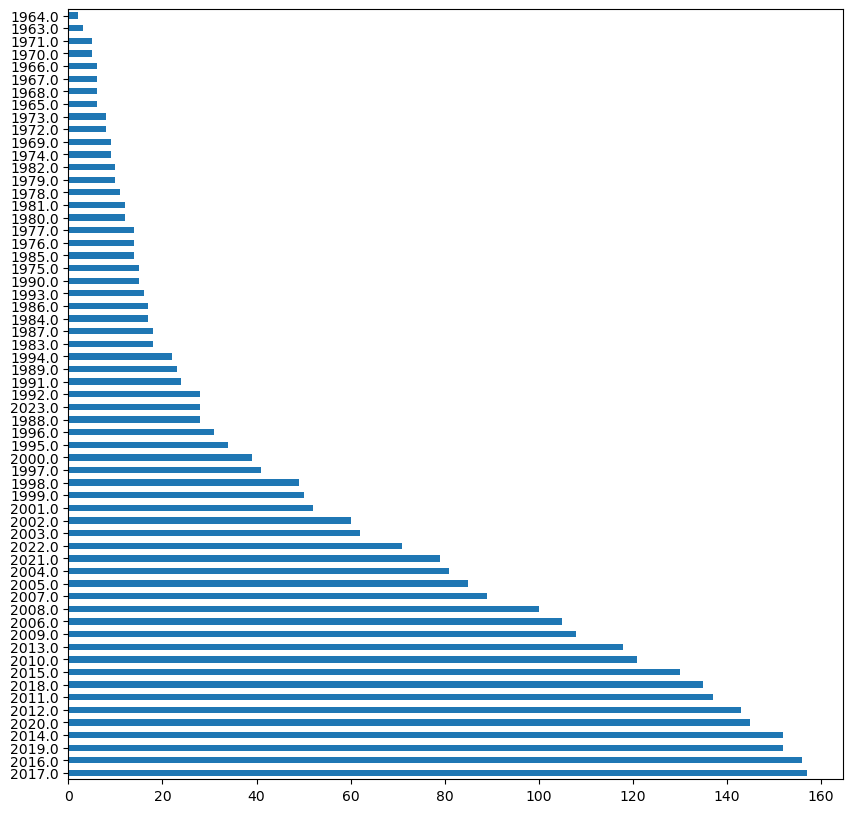

In [23]:
plt.figure(figsize=(10,10))
df['year'].value_counts().plot(kind='barh')
plt.show()

# ---> As we can see the least anime produced were during 1964 but as the years passed with the devlopment of technology moving forward,2017 has been the year in which most (about 155 ) animes were released <---

### 9 Displaying status of anime

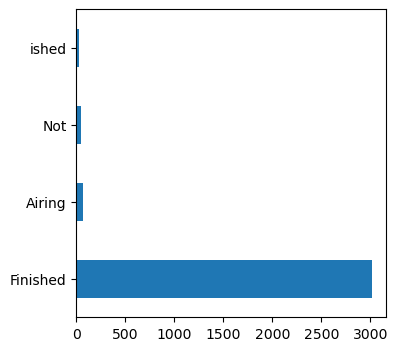

In [24]:
plt.figure(figsize=(4,4))
df['status'].value_counts().plot(kind='barh')
plt.show()

# ----> There are more than 3000 animes which are completed <----

# 10) Displaying anime having max episode

In [25]:
df['eps'].max()

1787

In [26]:
df.loc[df['eps']==1787]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
425,Doraemon (1979),Shin-Ei Animation,Anthropomorphic,"Adventure, Comedy, Fantasy, Sci-Fi",Manga,7.77,1979.0,Nobita Nobi is a normal fourth grade student. ...,Shounen,Finished,1787,11.0,55000.0


## ----> Doraemon is the anime having the max episodes (1787) from this list <----

# 11) Displaying animes which were animated by Mappa Studio

In [27]:
df.loc[df['studio']=="MAPPA"]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
13,Jujutsu Kaisen,MAPPA,School,"Action, Fantasy",Manga,8.670000,2020.0,Idly indulging in baseless paranormal activiti...,Shounen,Finished,24,23.0,200000.0
25,Shingeki no Kyojin: The Final Season,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,8.830000,2020.0,Gabi Braun and Falco Grice have been training ...,Shounen,Finished,16,23.0,170000.0
36,Kakegurui,MAPPA,"High Stakes Game, Psychological, School, Strat...","Drama, Mystery",Manga,7.260000,2017.0,"Unlike many schools, attending Hyakkaou Privat...",Shounen,Finished,12,24.0,130000.0
49,Dororo,MAPPA,"Historical, Mythology, Samurai","Action, Adventure, Supernatural",Manga,8.240000,2019.0,The greedy samurai lord Daigo Kagemitsu's land...,Shounen,Finished,24,24.0,100000.0
61,Shingeki no Kyojin: The Final Season Part 2,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,8.810000,2022.0,Turning against his former allies and enemies ...,Shounen,Finished,12,23.0,937000.0
88,Kakegurui××,MAPPA,"High Stakes Game, Psychological, School, Strat...","Drama, Mystery",Manga,7.200000,2019.0,As Yumeko Jabami's fame grows and the reputati...,Shounen,Finished,12,24.0,688000.0
123,Chainsaw Man,MAPPA,Gore,"Action, Adventure",Manga,7.033518,2022.0,Denji has a simple dream—to live a happy and p...,Shounen,Not,43,NaN,482000.0
230,Ushio to Tora (TV),MAPPA,Mythology,"Action, Adventure, Comedy, Supernatural",Manga,7.580000,2015.0,Ushio Aotsuki is a stubborn middle school stud...,Shounen,Finished,26,24.0,212000.0
254,Shingeki no Kyojin: The Final Season - Kankets...,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,7.033518,2023.0,NaN,Shounen,Not,43,NaN,178000.0
297,Days (TV),MAPPA,"School, Team Sports",Sports,Manga,7.170000,2016.0,The series is about two boys named Tsukushi an...,Shounen,Finished,24,24.0,134000.0


## ---->There are total 24 episodes in this list which are animated by Mappa Studio <-----

# 12) Displaying animes who are rated above 90 Million

In [40]:
df.loc[df['rated_by']>900000.0]

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
53,Tokyo Revengers,LIDENFILMS,"Delinquents, School, Time Travel","Action, Drama, Supernatural",Manga,8.090000,2021.0,Takemichi Hanagaki’s second year of middle sch...,Shounen,Finished,24,23.0,998000.0
54,Kimetsu no Yaiba: Yuukaku-hen,ufotable,Historical,"Action, Fantasy",Manga,8.850000,2021.0,The devastation of the Mugen Train incident st...,Shounen,Finished,11,26.0,979000.0
55,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,David Production,Shounen,"Action, Adventure, Comedy, Drama, Supernatural",Manga,8.500000,2016.0,"The year is 1999. Morioh, a normally quiet and...",Shounen,Finished,39,23.0,968000.0
56,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,David Production,Shounen,"Action, Adventure, Drama, Supernatural",Manga,8.440000,2015.0,Joutarou Kuujou and his allies have finally ma...,Shounen,Finished,24,23.0,965000.0
57,Gintama,Sunrise,"Gag Humor, Historical, Parody, Samurai","Action, Comedy, Sci-Fi",Manga,8.950000,2006.0,Edo is a city that was home to the vigor and a...,Shounen,Finished,201,24.0,964000.0
58,Magi: The Labyrinth of Magic,A-1 Pictures,Shounen,"Action, Adventure, Fantasy",Manga,8.020000,2012.0,A Magi is a magician whose inclination toward ...,Shounen,Finished,25,24.0,957000.0
59,Saiki Kusuo no Ψ-nan,Egg Firm,"Gag Humor, School","Comedy, Supernatural",Manga,8.420000,2016.0,"To the average person, psychic abilities might...",Shounen,Finished,120,5.0,953000.0
60,Boku no Hero Academia 5th Season,Bones,"School, Super Power",Action,Manga,7.420000,2021.0,UA Academy's Class 1-A has been the focus of a...,Shounen,Finished,25,23.0,952000.0
61,Shingeki no Kyojin: The Final Season Part 2,MAPPA,"Gore, Military, Survival","Action, Drama",Manga,8.810000,2022.0,Turning against his former allies and enemies ...,Shounen,Finished,12,23.0,937000.0
62,Dragon Ball,Toei Animation,"Martial Arts, Super Power","Adventure, Comedy, Fantasy",Manga,7.960000,1986.0,Gokuu Son is a young boy who lives in the wood...,Shounen,Finished,153,24.0,932000.0


### ---> There are total of 38 animes which are been rated by more than 90 Million people <---